# Analysis of Straight Line Structures

How can we extract the straight lines from structures? This notebooks explores some of the techniques used to accomplish this task.

In [73]:
import cv2
import os
import IPython.display as dis
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Display images

In [74]:
image_folder = "Images"

In [75]:
images = [image for image in os.listdir(image_folder) if os.path.splitext(image)[-1].lower() == ".jpg"]

In [76]:
images

['FlareTower3.jpg',
 'FlareTower2.jpg',
 'TransmissionTower2.jpg',
 'FlareTower1.jpg',
 'TransmissionTower1.jpg']

'FlareTower3.jpg'

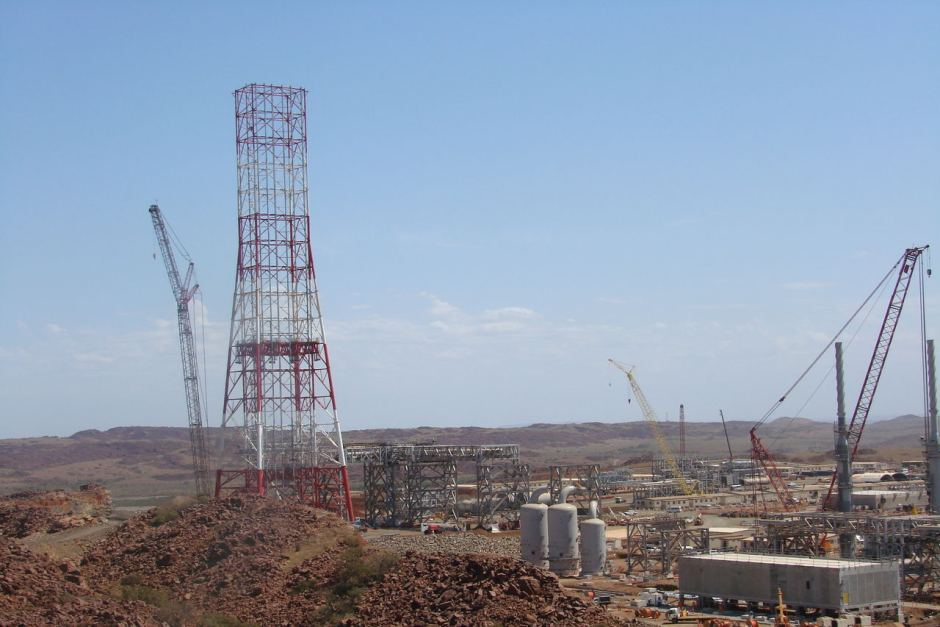

'FlareTower2.jpg'

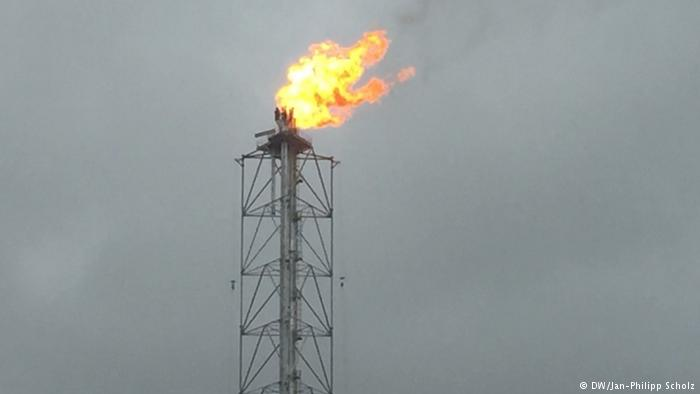

'TransmissionTower2.jpg'

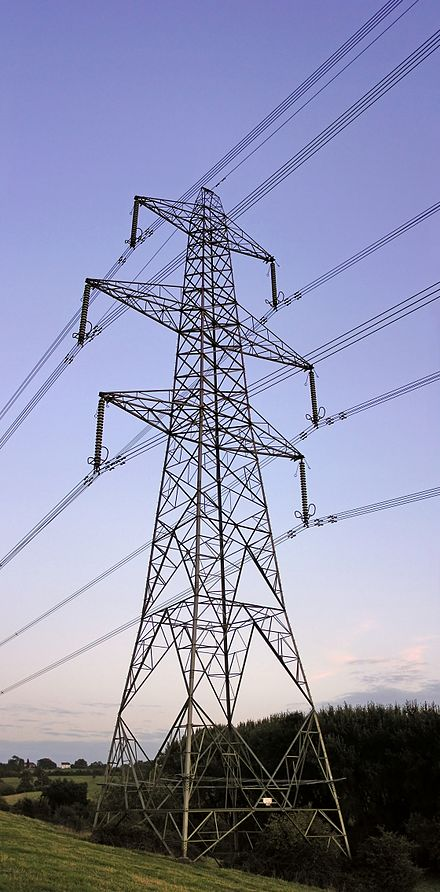

'FlareTower1.jpg'

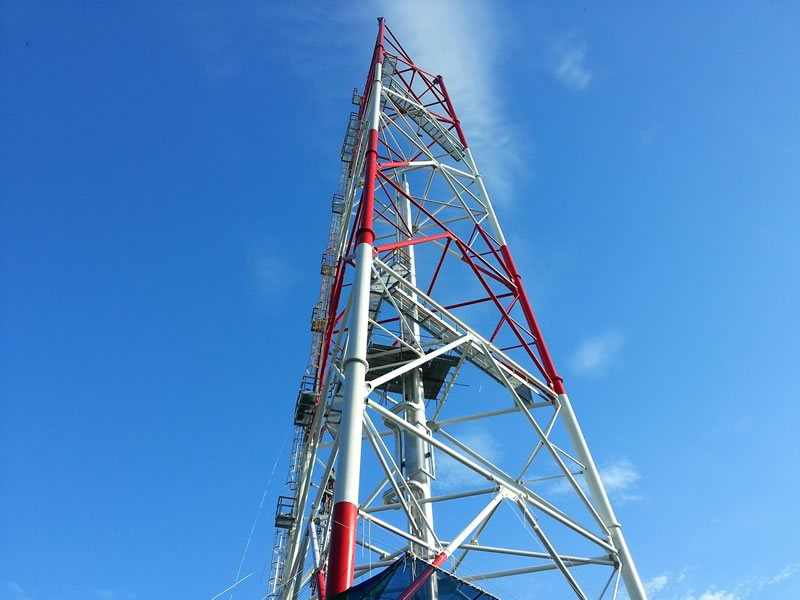

'TransmissionTower1.jpg'

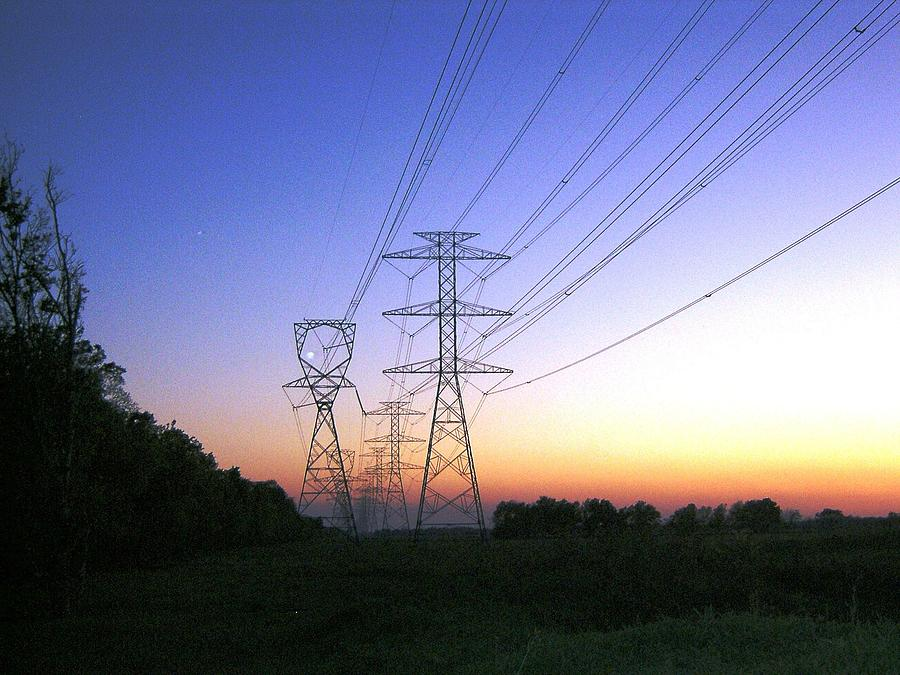

In [77]:
for image in images:
    dis.display(image)
    dis.display(dis.Image(os.path.join(image_folder, image)))

## Choose an image and transform it

The HoughLines transformation requires a black and white image. Therefore, we should read in an image and convert.

In [79]:
image_path = os.path.join(image_folder, images[2])
image_array_colour = cv2.imread(image_path)
image_array_grayscale = cv2.cvtColor(image_array_colour, cv2.COLOR_BGR2GRAY)

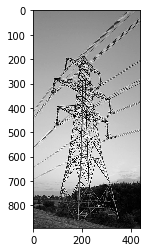

In [80]:
plt.imshow(image_array_grayscale, cmap=plt.get_cmap("gray"))

In [81]:
lines = cv2.HoughLinesP(image_array_grayscale, 1, math.pi/180, 100 )

## Key learning number 1: Without Canny, ye canny do it

Canny filtering is absolutely key to this performance. 

Without Canny filtering, we return a garbage number of lines.

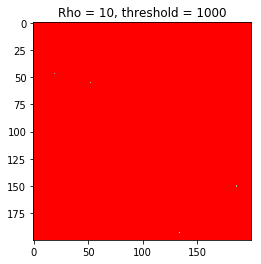

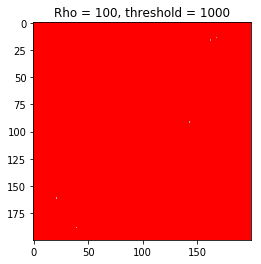

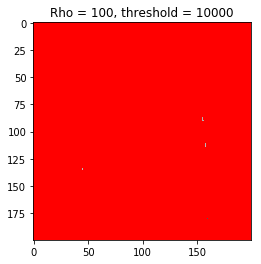

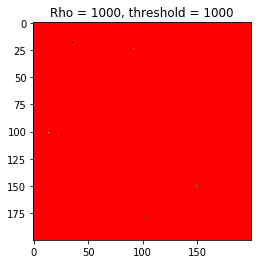

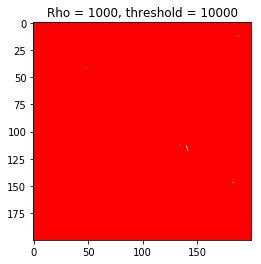

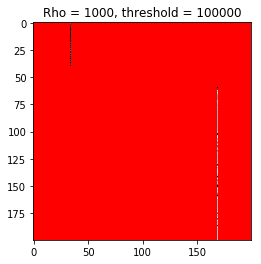

In [85]:
for rho in (0.01, 0.1, 1, 10, 100, 1000):
    for threshold in (1000, 10000, 100000):
        lines = cv2.HoughLinesP(image_array_grayscale, rho, math.pi/180, threshold)
        if lines is not None:
            plt.figure()
            image_array_grayscale_markedup = cv2.cvtColor(image_array_grayscale, cv2.COLOR_GRAY2RGB)
            for line in lines:
                line = line[0]  # Curious shape of the return of the HoughLinesP function
                cv2.line(
                    image_array_grayscale_markedup, 
                    (line[0], line[1]),  # Point 1
                    (line[2], line[3]),  # Point 2
                    (255, 0, 0),  # Colour
                    3  # Thickness
                )
            plt.title(f"Rho = {rho}, threshold = {threshold}")
            plt.imshow(image_array_grayscale_markedup[200:400, 100:300])

With Canny filtering, the edges of the image are neatly display and we can obtain much more reasonable images.

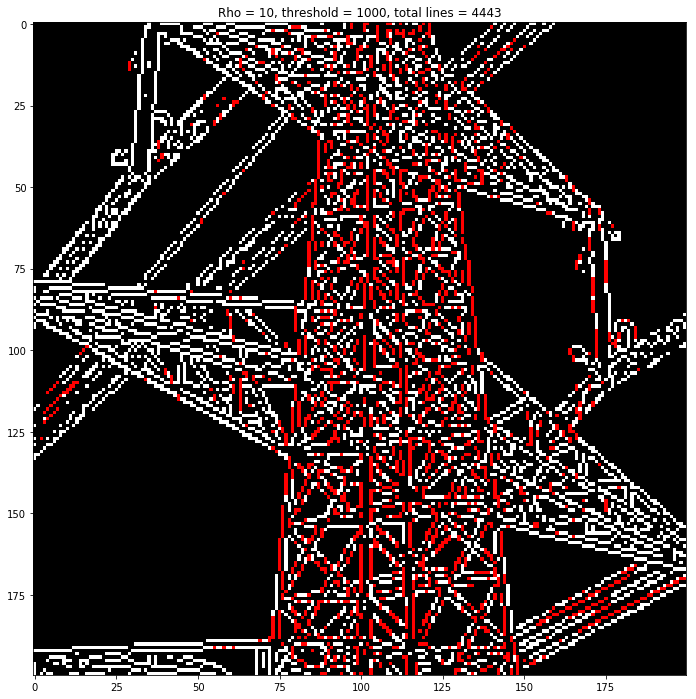

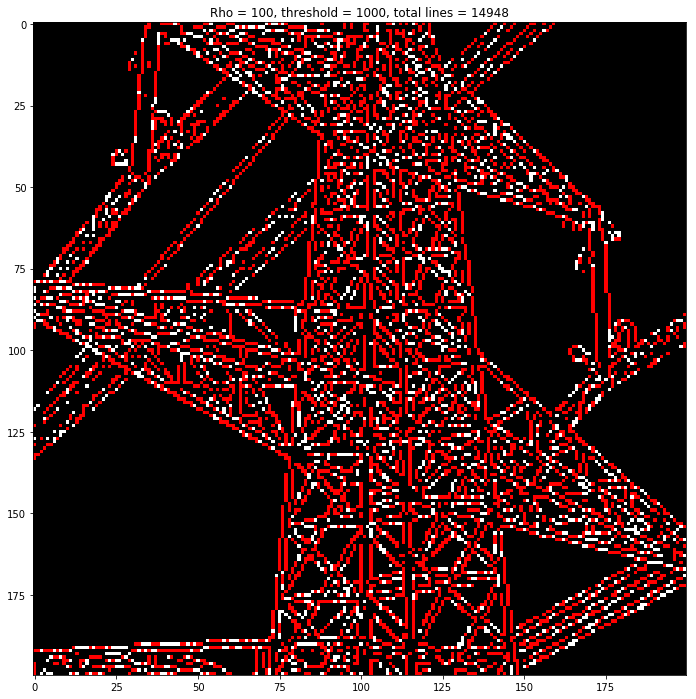

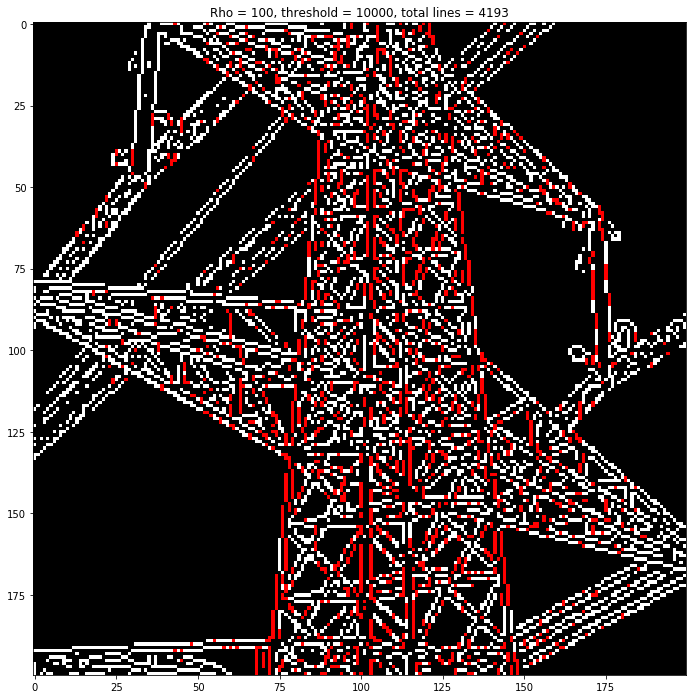

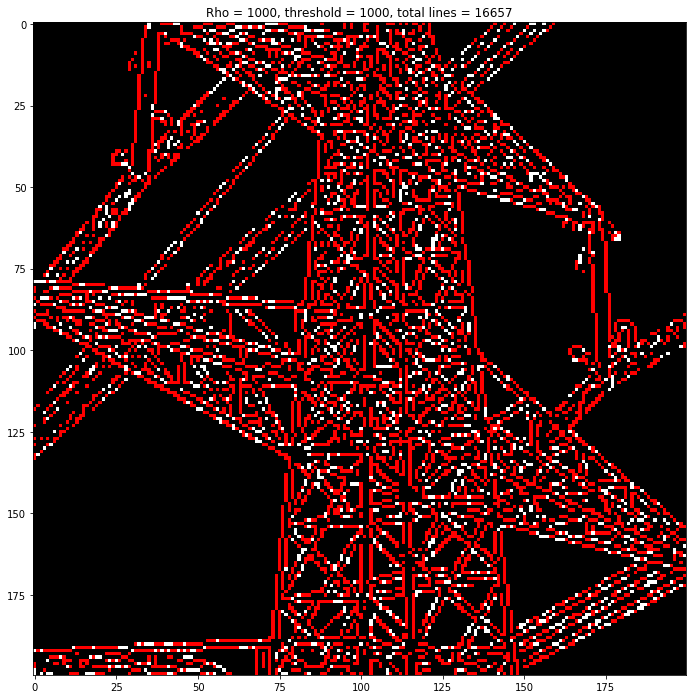

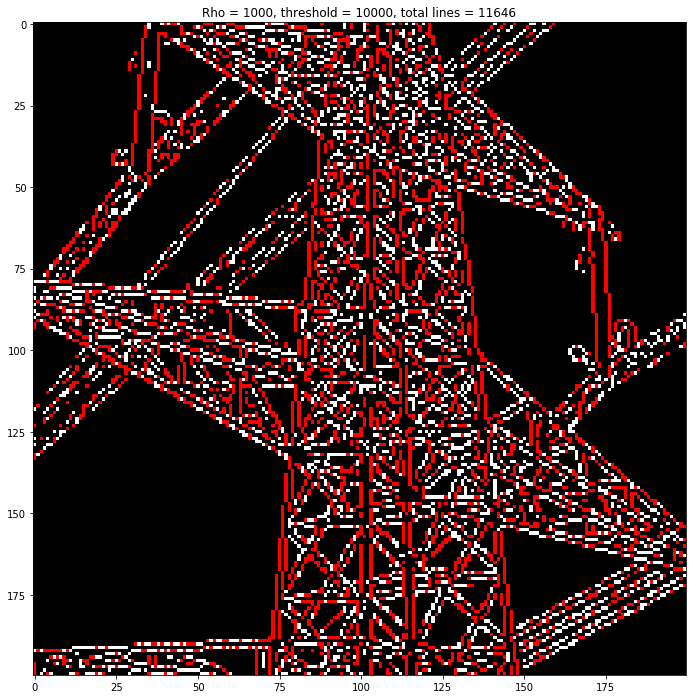

In [86]:
for rho in (0.01, 0.1, 1, 10, 100, 1000):
    for threshold in (1000, 10000, 100000):
        image_array_canny = cv2.Canny(image_array_grayscale, 200, 200)
        lines = cv2.HoughLinesP(image_array_canny, rho, math.pi/180, threshold)
        if lines is not None:
            plt.figure(figsize=(12,12))
            image_array_grayscale_markedup = cv2.cvtColor(image_array_canny, cv2.COLOR_GRAY2RGB)
            num_lines = lines.shape[0]
            for line in lines:
                line = line[0]  # Curious shape of the return of the HoughLinesP function
                cv2.line(
                    image_array_grayscale_markedup, 
                    (line[0], line[1]),  # Point 1
                    (line[2], line[3]),  # Point 2
                    (255, 0, 0),  # Colour
                    1  # Thickness
                )
            plt.title(f"Rho = {rho}, threshold = {threshold}, total lines = {num_lines}")
            plt.imshow(image_array_grayscale_markedup[200:400, 100:300])

## Further thoughts

We have an awful lot of variables to work with here. If we are always expecting to get a certain number of outcomes from a certain area, could we apply some kind of automatic optimisation to arrive to the right value?